In [1]:
#importing all the neccessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# download and read haberman.csv file

data = pd.read_csv("haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attribute Information:
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year

In [3]:
print("Shape: {} data points, {} features".format(data.shape[0],data.shape[1]))
print(data.info())

Shape: 306 data points, 4 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


* There is no Null data in the datset

In [4]:
#replacing '2' with '0' denoting patient died within 5 years
data['status'].replace(2,'0',inplace = True)
data['status'].replace(1,'1',inplace = True)

In [5]:
A =dict(data["status"].value_counts())
print("The patient survived 5 years or longer:{} |percentage:{}".format(A['1'],(A['1']*100//306)))
print("The patient died within 5 years :{} |percentage:{}".format(A['0'],(A['0']*100//306)))

The patient survived 5 years or longer:225 |percentage:73
The patient died within 5 years :81 |percentage:26


* In the given dataset 73% of patients survived 5 years or longer whereas 26% patients died within 5 years post sugery

In [6]:
data.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


* Mean and Median age of the patients is approximately 52 years
* Mean and Median of axillary nodes in patients is approximately 4

# Univariate Analysis

+ 'S' denotes data of people survived greater than 5 years
+ 'D' denotes data of people died within 5 years

In [7]:
S = data.loc[data['status']=='1']
D = data.loc[data['status']=='0']
print("Stats of patients who survived 5 or more years:\n",S.describe(),'\n')
print("Stats of patients who died within 5 years:\n",D.describe())

Stats of patients who survived 5 or more years:
               age        year       nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000 

Stats of patients who died within 5 years:
              age       year      nodes
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000


* The average age of patients who survived 5 or more years is 52 and that of patients who died within 5 years is between 53-54 
* The average number of axillary nodes present in patients who survived 5 or more years is between 2-3 and that of patients who died within 5 years is between 7-8 
* 75% of the patients who survived 5 or more years have 0-3 axillary nodes
* More than 50% of the patients who died within 5 years have 4 or more axillary nodes

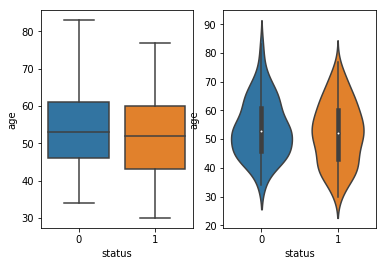

In [8]:
plt.subplot(1,2,1)
sns.boxplot(x = 'status',y = 'age',data = data)
plt.subplot(1,2,2)
sns.violinplot(x = 'status',y = 'age',data = data)
plt.show()

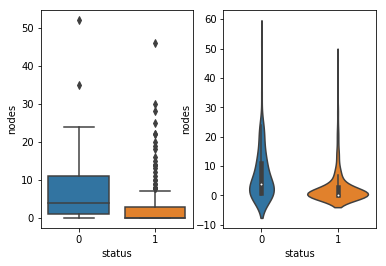

In [9]:
plt.subplot(1,2,1)
sns.boxplot(x = 'status', y = 'nodes',data = data)
plt.subplot(1,2,2)
sns.violinplot(x = 'status', y = 'nodes',data = data)
plt.show()

* The survival rate of patients is more when few nodes are present and vice versa

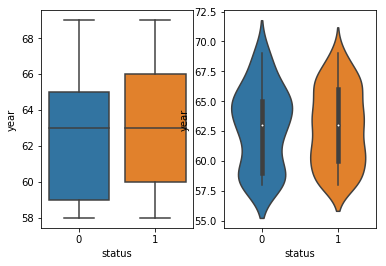

In [10]:
plt.subplot(1,2,1)
sns.boxplot(x = 'status', y = 'year',data = data)
plt.subplot(1,2,2)
sns.violinplot(x = 'status', y = 'year',data = data)
plt.show()

# Multivariate/Bivariate Analysis

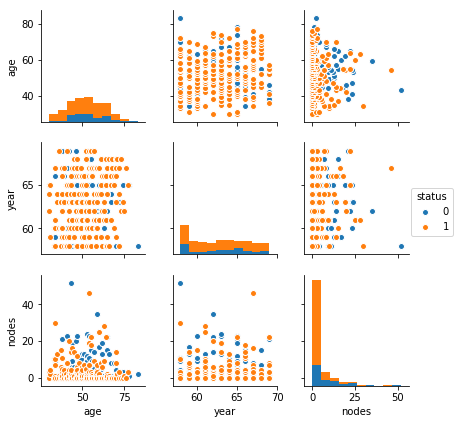

In [11]:
sns.pairplot(data,vars = ['age','year','nodes'],hue='status',size=2)
plt.show()

* Most of the points overlap, Hence difficult to classify(linearly inseparable) 
* Considering age vs. nodes

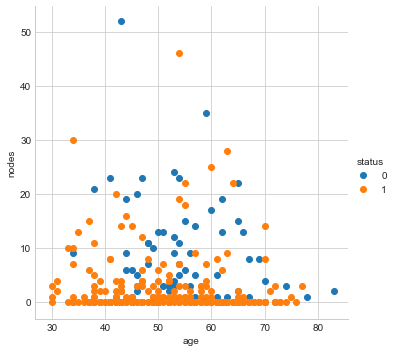

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue="status",size=5)\
   .map(plt.scatter,'age','nodes')\
   .add_legend()
plt.show()

* More deaths within 5 years is observed in the age group greater than 43 years(mean)

## Observations:
* There is no Null data in the datset
* In the given dataset 73% of patients survived 5 years or longer whereas 26% patients died within 5 years post sugery
---
* Mean and Median age of the patients is approximately 52 years
* The average age of patients who survived 5 or more years is 52 and that of patients who died within 5 years is between 53-54
---
* Mean and Median of axillary nodes in patients is approximately 4
* The average number of axillary nodes present in patients who survived 5 or more years is between 2-3 and that of patients who died within 5 years is between 7-8 
* 75% of the patients who survived 5 or more years have 0-3 axillary nodes
* More than 50% of the patients who died within 5 years have 4 or more axillary nodes
---
+ The survival rate of patients is more when few nodes are present and vice versa
+ More deaths within 5 years is observed in the age group greater than 43 years(mean)